# Handwritten Digits - MNIST dataset

We'll use the data as stored in the https://www.kaggle.com/c/digit-recognizer 

### Install the Kaggle CLI

Install the Kaggle Command Line Interface (CLI) - https://github.com/Kaggle/kaggle-api

In [1]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 1.8MB/s 
    100% |████████████████████████████████| 81kB 4.6MB/s 
  Running setup.py bdist_wheel for kaggle ... done
  Stored in directory: /Users/simongrest/Library/Caches/pip/wheels/87/ea/09/173986e395d051411b9d547a69fe96cdc26208cb1bcc3e5567
  Running setup.py bdist_wheel for python-slugify ... done
  Stored in directory: /Users/simongrest/Library/Caches/pip/wheels/16/7f/c3/6b0582283ad589d68a306da924a78c74546e010d8106b9b3a9
Successfully built kaggle python-slugify


From the 'My Account' page, go to 'Edit Profile' and download your API token. This will be a file called `kaggle.json` - place it in the ```~/.kaggle``` directory. Then run the below command to restrict the permissions on this file:

In [2]:
!chmod 600 ~/.kaggle/kaggle.json

Now go to https://www.kaggle.com/c/digit-recognizer and join the competition - this automatically accepts the competition rules

### Download the competition data

In [3]:
!kaggle competitions download digit-recognizer

100%|█████████████████████████████████████▉| 73.0M/73.2M [00:33<00:00, 2.40MB/s]
100%|██████████████████████████████████████| 73.2M/73.2M [00:33<00:00, 2.28MB/s]
100%|██████████████████████████████████████| 48.8M/48.8M [01:32<00:00, 2.40MB/s]

100%|█████████████████████████████████████████| 235k/235k [00:00<00:00, 739kB/s]



In [5]:
!ls *.csv

sample_submission.csv test.csv              train.csv


### Have a look at the data

In [6]:
import pandas as pd

In [8]:
train_df = pd.read_csv('train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_df = pd.read_csv('test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
sample_sub_df = pd.read_csv('sample_submission.csv')
sample_sub_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


### Reshape the data into tensors

In [25]:
train_df.shape, test_df.shape, test_df.shape[1]**.5

((42000, 785), (28000, 784), 28.0)

In [20]:
X_train = train_df.drop('label', axis=1).values.reshape(-1,1,28,28)
y_train = train_df.label.values

X_test = test_df.values.reshape(-1,1,28,28)

In [29]:
X_train[0]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,
           0,   0,   0

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline

label: 0


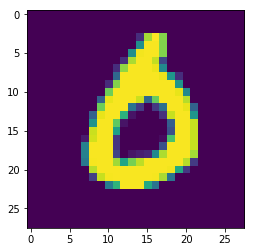

label: 9


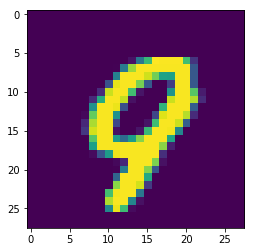

label: 2


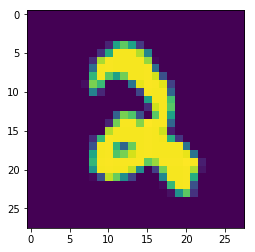

In [43]:
import random

for i in range(3):
    r = random.randint(0,len(y_train))
    print(f'label: {y_train[r]}')
    plt.imshow(X_train[r][0]) 
    plt.show()
    

In [50]:
import numpy as np

label: 4.46


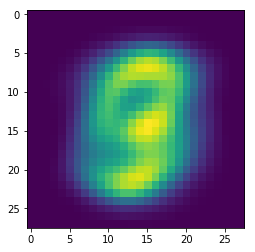

In [59]:
plt.imshow(np.mean(X_train,axis=0)[0])
print(f'label: {np.mean(y_train):.3}')